In [41]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold,train_test_split,cross_val_score
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,auc


import matplotlib.pyplot as plt
import seaborn as sns

import os
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:

df.value_counts("Class")


Class
0    284315
1       492
dtype: int64

In [9]:

df["Amount"].value_counts().describe()


count    32767.000000
mean         8.691885
std        107.571157
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max      13688.000000
Name: Amount, dtype: float64

In [11]:
df.shape

(284807, 31)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:

df = df.dropna()
X = df.drop('Class', axis=1)
y = df['Class']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


492 Of Frauds
284315 No Frauds


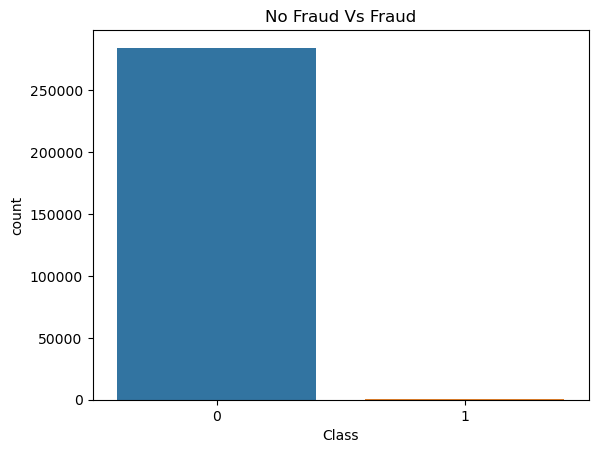

In [28]:
fraud=len(df[df["Class"]==1])
no_fraud=len(df[df["Class"]==0])
print(f"{fraud} Of Frauds")
print(f"{no_fraud} No Frauds")
sns.countplot(data=df ,x="Class")
plt.title("No Fraud Vs Fraud")
plt.show()

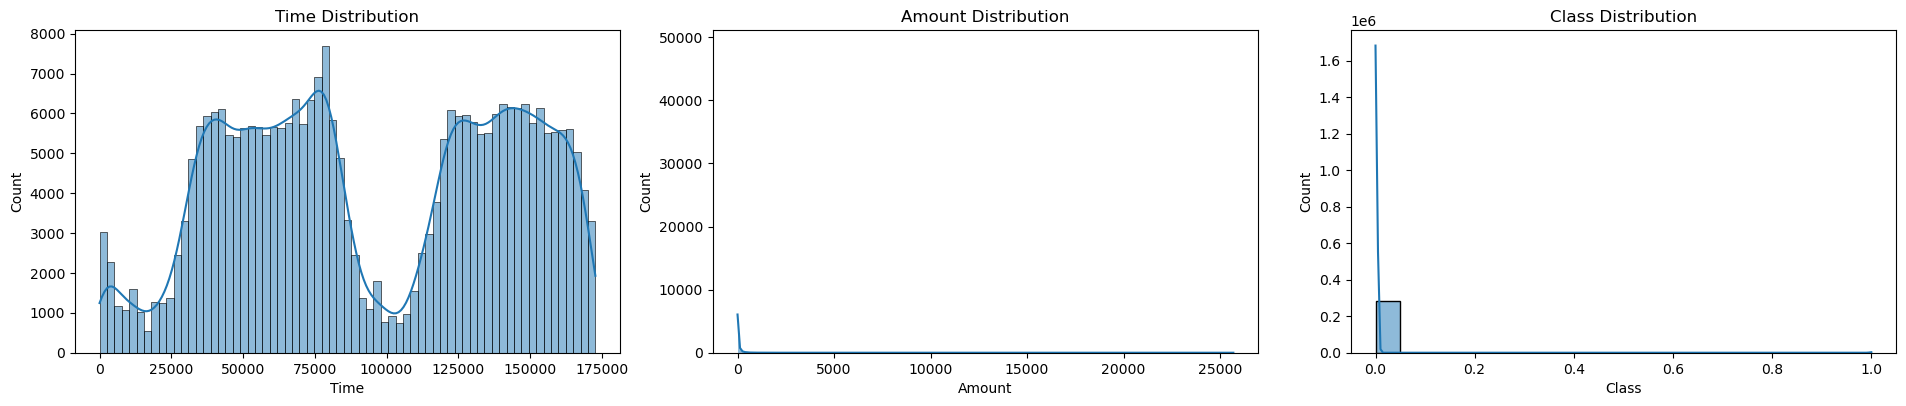

In [30]:
fig,axs=plt.subplots(1,3,figsize=(19,4))
sns.histplot(df["Time"],ax=axs[0],kde=True)
axs[0].set_title("Time Distribution")

sns.histplot(df["Amount"],ax=axs[1],kde=True)
axs[1].set_title("Amount Distribution")

sns.histplot(df["Class"],ax=axs[2],kde=True)
axs[2].set_title("Class Distribution")
plt.tight_layout(pad=.5)
plt.show()

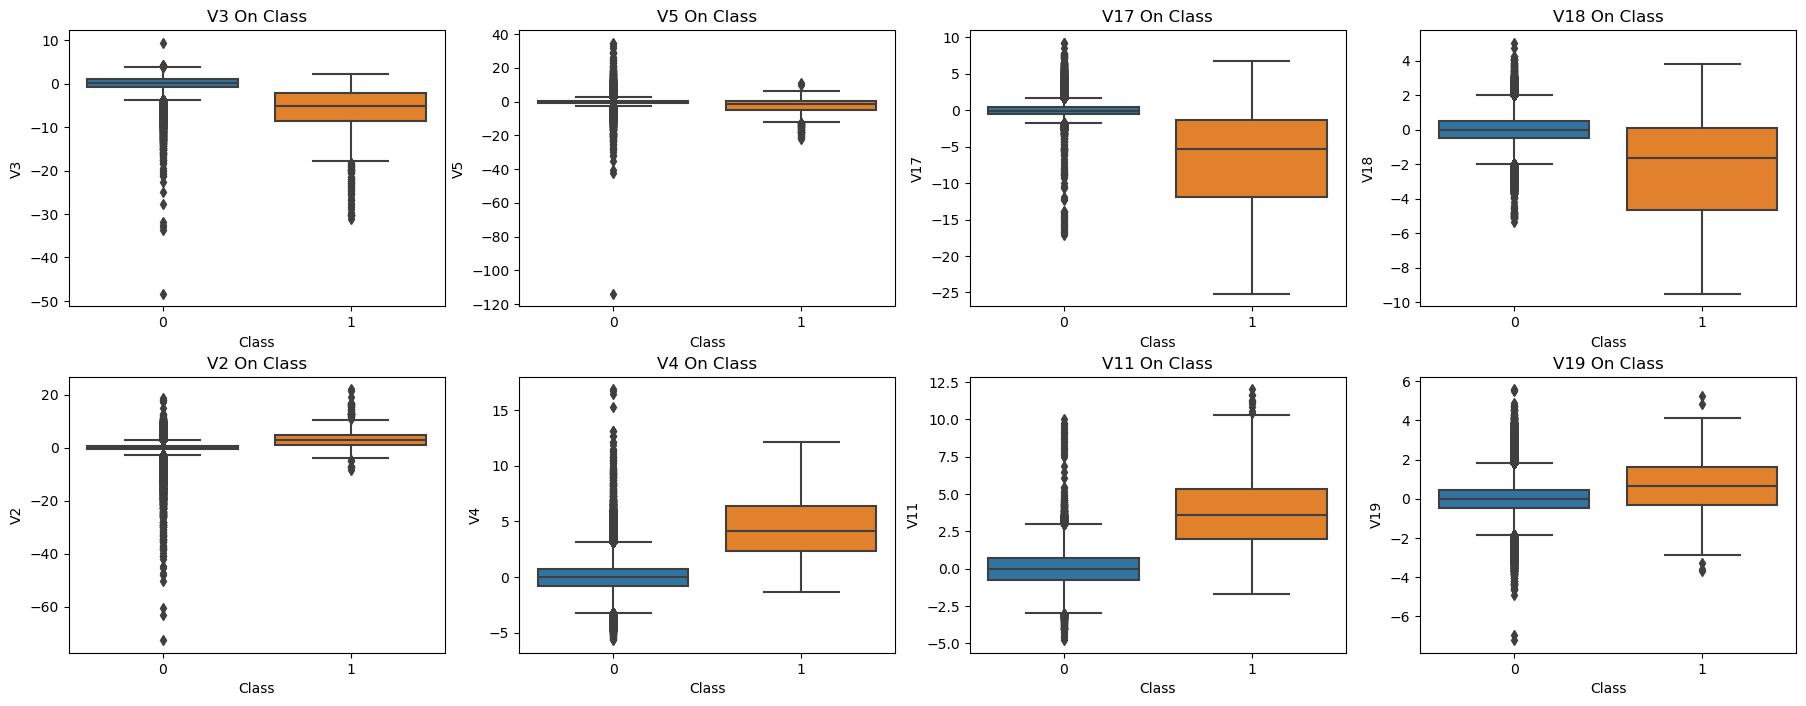

In [32]:
negative_corr_cols=["V3","V5","V17","V18"]
positive_corr_cols=["V2","V4","V11","V19"]

fig,axs=plt.subplots(nrows=2,ncols=4,figsize=(18,7))
sns.boxplot(ax=axs[0,0],data=df,x="Class",y=negative_corr_cols[0])
axs[0,0].set_title("V3 On Class")

sns.boxplot(ax=axs[0,1],data=df,x="Class",y=negative_corr_cols[1])
axs[0,1].set_title("V5 On Class")

sns.boxplot(ax=axs[0,2],data=df,x="Class",y=negative_corr_cols[2])
axs[0,2].set_title("V17 On Class")

sns.boxplot(ax=axs[0,3],data=df,x="Class",y=negative_corr_cols[3])
axs[0,3].set_title("V18 On Class")

sns.boxplot(ax=axs[1,0],data=df,x="Class",y=positive_corr_cols[0])
axs[1,0].set_title("V2 On Class")

sns.boxplot(ax=axs[1,1],data=df,x="Class",y=positive_corr_cols[1])
axs[1,1].set_title("V4 On Class")

sns.boxplot(ax=axs[1,2],data=df,x="Class",y=positive_corr_cols[2])
axs[1,2].set_title("V11 On Class")

sns.boxplot(ax=axs[1,3],data=df,x="Class",y=positive_corr_cols[3])
axs[1,3].set_title("V19 On Class")

plt.tight_layout(pad=.5)
plt.show()


In [36]:
X=df.drop(columns="Class",axis=1).values
y=df["Class"].values


In [42]:
models={
    "SVM":SVC(),
    "DecisionTree":DecisionTreeClassifier(random_state=42)
}


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [46]:

stsc=StandardScaler()
rbsc=RobustScaler()

# Scale The Time And Amount Columns
df["Scaled Amount"]=stsc.fit_transform(df["Amount"].values.reshape(-1,1))
df["Scaled Time"]=rbsc.fit_transform(df["Time"].values.reshape(-1,1))

#Drop The Unscaled Data
df.drop(columns=["Time","Amount"],axis=1,inplace=True)

In [ ]:
from tqdm import tqdm
for i,m in tqdm(enumerate(models)):
    model=models[m].fit(X_train,y_train)
    scores=[]
    score=cross_val_score(model,X_train,y_train,cv=5)
    print(f"{m} Has A Score Of {np.mean(score)}")

1it [03:45, 225.25s/it]

SVM Has A Score Of 0.9982707542408216
